In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

import io
import requests
import warnings

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Task
### Determine which variables have the greatest impact on the price?

### Importing Data

In [2]:
url = 'https://raw.githubusercontent.com/tsenior97/Cars_dataset/main/car_dataframe.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df.shape

(1000, 20)

In [4]:
df.head(5)

,Unnamed: 0,Make,Model,Registration,Location,Transmission,Seats,Fuel_Type,Fuel_Eco,Insurance_Group,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR,Reserved,URL
0,0,CHEVROLET,SPARK LS,BP63NXZ,Cannock,Manual,5,Petrol,55.0,4E,119,17824,2014,4499,4721.0,9220.0,94.44,9.9,False,https://www.availablecar.com/used-cars/chevrol...
1,1,Toyota,Aygo 1.0 VVT-i Move,AF64HZA,Sutton in Ashfield,Manual,4,Petrol,65.0,3E,99,51658,2014,5099,5466.0,10565.0,107.03,9.9,False,https://www.availablecar.com/used-cars/toyota-...
2,2,Skoda,Citigo 1.0 60 SE,YB64HVT,Sutton in Ashfield,Manual,4,Petrol,62.0,1E,105,48599,2014,5099,3906.0,9005.0,107.03,9.9,False,https://www.availablecar.com/used-cars/skoda-c...
3,3,Fiat,Panda 1.2 Pop,NA64YJC,Castle Donnington,Manual,4,Petrol,54.0,4U,120,25250,2014,5499,3541.0,9040.0,115.43,9.9,False,https://www.availablecar.com/used-cars/fiat-pa...
4,4,Fiat,500 1.2 Colour Therapy,MT15KZY,Leeds,Manual,4,Petrol,58.0,7U,113,39838,2015,5999,5166.0,11165.0,125.92,9.9,False,https://www.availablecar.com/used-cars/fiat-50...


### Checking & cleaning the Data 




In [5]:
df = df.drop(["Unnamed: 0"], axis=1)
df.isna().sum()

Make                0
Model               0
Registration        0
Location            0
Transmission        0
Seats               0
Fuel_Type           0
Fuel_Eco           11
Insurance_Group    10
CO2                 0
Milage              0
Year                0
Price(£)            0
Price_diff         26
Price on New(£)    26
Price per month     0
APR                 0
Reserved            0
URL                 0
dtype: int64

In [6]:
list(df.columns)

['Make',
 'Model',
 'Registration',
 'Location',
 'Transmission',
 'Seats',
 'Fuel_Type',
 'Fuel_Eco',
 'Insurance_Group',
 'CO2',
 'Milage',
 'Year',
 'Price(£)',
 'Price_diff',
 'Price on New(£)',
 'Price per month',
 'APR',
 'Reserved',
 'URL']

In [7]:
df['Registration'].value_counts()

VK16JZN    2
WG68EAJ    2
FE66OJL    1
DG69WBX    1
SK68UBR    1
          ..
DS68VWU    1
BN66YVC    1
YL14FEP    1
WD65KSE    1
PN65LDY    1
Name: Registration, Length: 998, dtype: int64

In [8]:
df[df['Registration']=='VK16JZN']

,Make,Model,Registration,Location,Transmission,Seats,Fuel_Type,Fuel_Eco,Insurance_Group,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR,Reserved,URL
596,Bmw,1 118i 1.5 Sport 5dr,VK16JZN,Cannock,Manual,5,Petrol,53.0,18E,123,52622,2016,11400,10320.0,21720.0,229.12,7.9,False,https://www.availablecar.com/used-cars/bmw-1-s...
908,Bmw,1 118i 1.5 Sport 5dr,VK16JZN,Leeds,Manual,5,Petrol,53.0,18E,123,52622,2016,12799,8921.0,21720.0,257.24,7.9,False,https://www.availablecar.com/used-cars/bmw-1-s...


In [9]:
urls_test = df[df['Registration']=='VK16JZN'].URL.values
urls_test[0] == urls_test[1]

True

In [10]:
urls_test[0] ## Hyper link suggests row 596 is out of date / incorrect (drop row)

'https://www.availablecar.com/used-cars/bmw-1-series-53076'

In [11]:
df.drop([596], inplace=True)

In [12]:
df[df['Registration']=='WG68EAJ'] ### Duplicate

,Make,Model,Registration,Location,Transmission,Seats,Fuel_Type,Fuel_Eco,Insurance_Group,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR,Reserved,URL
539,Renault,Clio 0.9 TCE 75 Play,WG68EAJ,Sutton in Ashfield,Manual,5,Petrol,47.0,8E,113,12639,2018,11199,2081.0,13280.0,225.08,7.9,False,https://www.availablecar.com/used-cars/renault...
540,Renault,Clio 0.9 TCE 75 Play,WG68EAJ,Sutton in Ashfield,Manual,5,Petrol,47.0,8E,113,12639,2018,11199,2081.0,13280.0,225.08,7.9,False,https://www.availablecar.com/used-cars/renault...


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['Make'].value_counts()

Vauxhall         183
Ford             105
Fiat              86
Citroen           86
Peugeot           84
Renault           69
Volkswagen        52
Nissan            42
Toyota            31
Skoda             30
Kia               30
Suzuki            25
Mini              24
Seat              21
DS                20
Smart             18
Audi              16
Hyundai           14
Dacia             12
Abarth            11
Honda              9
Bmw                5
Volvo              5
Mazda              4
Jeep               4
MG                 3
BMW                3
Mitsubishi         2
CHEVROLET          1
Dacier             1
Mercedes-Benz      1
Ssangyong          1
Name: Make, dtype: int64

In [15]:
df.replace('Bmw', 'BMW', inplace=True)

In [16]:
round(df['Price(£)'] / df['Price per month']).value_counts()

50.0    667
48.0    331
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             998 non-null    object 
 1   Model            998 non-null    object 
 2   Registration     998 non-null    object 
 3   Location         998 non-null    object 
 4   Transmission     998 non-null    object 
 5   Seats            998 non-null    int64  
 6   Fuel_Type        998 non-null    object 
 7   Fuel_Eco         987 non-null    float64
 8   Insurance_Group  988 non-null    object 
 9   CO2              998 non-null    int64  
 10  Milage           998 non-null    int64  
 11  Year             998 non-null    int64  
 12  Price(£)         998 non-null    int64  
 13  Price_diff       972 non-null    float64
 14  Price on New(£)  972 non-null    float64
 15  Price per month  998 non-null    float64
 16  APR              998 non-null    float64
 17  Reserved        

### Analysing the Data 

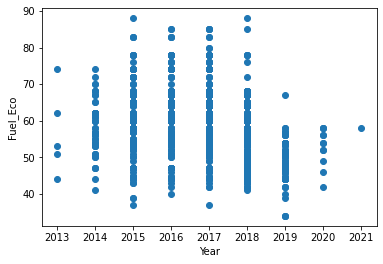

In [18]:
x = np.array(df['Year'])
y = np.array(df['Fuel_Eco'])


plt.xlabel('Year')
plt.ylabel('Fuel_Eco')

plt.scatter(x, y)
plt.show()

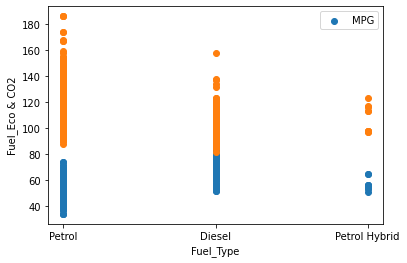

In [19]:
x = np.array(df['Fuel_Type'])
y = np.array(df['Fuel_Eco'])

x_2 = np.array(df['Fuel_Type'])
y_2 = np.array(df['CO2'])

plt.xlabel('Fuel_Type')
plt.ylabel('Fuel_Eco & CO2')

plt.scatter(x, y, label='MPG')
plt.scatter(x_2, y_2, label='')
plt.legend()
plt.show()

In [20]:
Petrol_mpg = df[df['Fuel_Type'] == 'Petrol']['Fuel_Eco'].mean()
Diesel_mpg = df[df['Fuel_Type'] == 'Diesel']['Fuel_Eco'].mean()
Petrol_hy_mpg = df[df['Fuel_Type'] == 'Petrol Hybrid']['Fuel_Eco'].mean()

Petrol_co2 = df[df['Fuel_Type'] == 'Petrol']['CO2'].mean()
Diesel_co2 = df[df['Fuel_Type'] == 'Diesel']['CO2'].mean()
Petrol_hy_co2 = df[df['Fuel_Type'] == 'Petrol Hybrid']['CO2'].mean()

print('Petrol produces', round(Petrol_co2, 3), 'g/km while doing', round(Petrol_mpg, 3),'mpg')
print('Diesel produces', round(Diesel_co2, 3), 'g/km while doing', round(Diesel_mpg, 3),'mpg')
print('Petrol Hybrids produces', round(Petrol_hy_co2, 3), 'g/km while doing', round(Petrol_hy_mpg, 3),'mpg')

Petrol produces 115.348 g/km while doing 54.998 mpg
Diesel produces 103.208 g/km while doing 71.113 mpg
Petrol Hybrids produces 106.182 g/km while doing 56.273 mpg


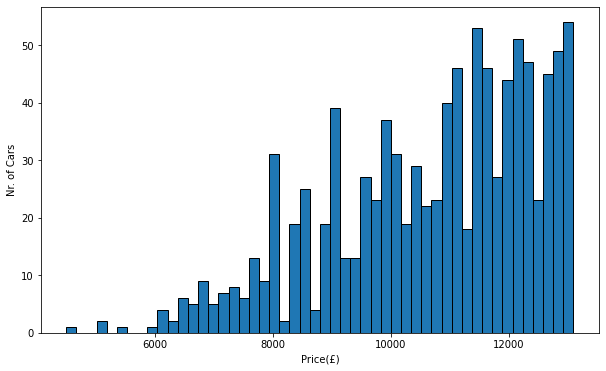

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['Price(£)'], bins=50, ec='black')
plt.xlabel('Price(£)')
plt.ylabel('Nr. of Cars')
plt.show()

In [22]:
df['Transmission'].value_counts()

Manual       923
Automatic     75
Name: Transmission, dtype: int64

In [23]:
df['Fuel_Type'].value_counts()

Petrol           819
Diesel           168
Petrol Hybrid     11
Name: Fuel_Type, dtype: int64

In [24]:
df[df['Fuel_Type'] == 'Diesel']['Year'].mean() 

2016.232142857143

In [25]:
df[df['Fuel_Type'] == 'Petrol']['Year'].mean()

2016.976800976801

In [26]:
df['Make'].value_counts()

Vauxhall         183
Ford             105
Fiat              86
Citroen           86
Peugeot           84
Renault           69
Volkswagen        52
Nissan            42
Toyota            31
Kia               30
Skoda             30
Suzuki            25
Mini              24
Seat              21
DS                20
Smart             18
Audi              16
Hyundai           14
Dacia             12
Abarth            11
Honda              9
BMW                8
Volvo              5
Mazda              4
Jeep               4
MG                 3
Mitsubishi         2
CHEVROLET          1
Dacier             1
Mercedes-Benz      1
Ssangyong          1
Name: Make, dtype: int64

In [27]:
df.describe() 

,Seats,Fuel_Eco,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR
count,998.000000,987.000000,998.000000,9.980000e+02,998.000000,998.000000,972.000000,972.000000,998.000000,998.000000
mean,4.700401,57.754813,113.203407,6.419298e+04,2016.865731,10682.733467,5224.451646,15905.309671,217.249188,8.563327
std,0.558889,9.709506,15.359213,2.933302e+05,1.503592,1752.664195,2848.299397,3507.937728,32.468959,0.942094
min,2.000000,34.000000,82.000000,4.570000e+02,2007.000000,4499.000000,126.000000,8580.000000,94.440000,7.900000
25%,4.000000,51.000000,102.000000,1.667700e+04,2016.000000,9499.000000,3241.000000,13338.750000,199.390000,7.900000
50%,5.000000,57.000000,110.000000,2.736700e+04,2017.000000,11099.000000,4561.000000,15419.500000,223.070000,7.900000
75%,5.000000,64.000000,122.000000,3.908800e+04,2018.000000,12099.000000,6784.750000,18070.000000,243.170000,9.900000
max,7.000000,88.000000,186.000000,4.347129e+06,2021.000000,13099.000000,17421.000000,29920.000000,263.270000,9.900000


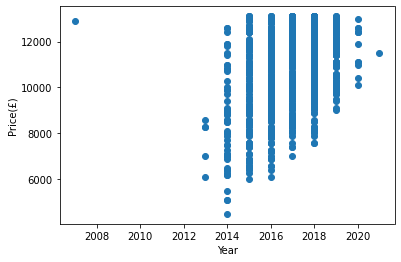

In [28]:
x = np.array(df['Year'])
y = np.array(df['Price(£)'])


plt.xlabel('Year')
plt.ylabel('Price(£)')

plt.scatter(x, y)
plt.show()

#### The car from 2007 is clearly an outlier in terms of age compaired to price
## Citroen C3 Aircross 1.2 PureTech 82 Feel 5dr was actually relased in 2017 so this is proably a typo on there part 

In [29]:
df[df['Year'] == 2007].URL.values

array(['https://www.availablecar.com/used-cars/skoda-roomster-54981'],
      dtype=object)

In [30]:
data = df[df['Year'] != 2007]
data = data.dropna()
data.shape

(952, 19)

In [31]:
#	Model		Location								

In [32]:
data['Model'].value_counts()

500 1.2 Lounge                                              25
Fiesta 1.1 Zetec                                            13
C3 1.2 PureTech 82 Flair                                     9
500 1.2 Lounge 3dr                                           9
108 1.0 Active                                               8
                                                            ..
208 1.2 PureTech 82 Active                                   1
1 116d 1.5 Sport 5dr Nav Sun Protection                      1
Clio 1.6T 200 Renaultsport 5dr EDC Cup Chassis Pack 18in     1
Ibiza Coupe 1.2 TSI 110 FR Technology 3dr 17in               1
Mokka 1.4T Tech Line 5dr Auto 2WD                            1
Name: Model, Length: 631, dtype: int64

In [33]:
data.corr() # finding the correlation between the data 
# We must also turn our string variables 'Make', 'Transmission', '', 'Insurance_Group' and  to numerical values
# URL, registration as primary values and will not be needed 
# Location is assumed to not play any factor. Model is assumed to have too many unique values 

,Seats,Fuel_Eco,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR,Reserved
Seats,1.000000,-0.066184,0.201102,0.047947,0.051478,0.379477,0.309422,0.441478,0.373008,-0.361754,0.037856
Fuel_Eco,-0.066184,1.000000,-0.801400,-0.022050,-0.319406,-0.169133,0.312753,0.168079,-0.169856,0.137861,0.118698
CO2,0.201102,-0.801400,1.000000,0.040734,0.048617,0.193459,0.040364,0.130038,0.192758,-0.164395,-0.016413
Milage,0.047947,-0.022050,0.040734,1.000000,0.031022,0.074428,-0.001142,0.036533,0.074408,-0.056882,0.026659
Year,0.051478,-0.319406,0.048617,0.031022,1.000000,0.423500,-0.448011,-0.149567,0.422867,-0.368561,-0.233422
Price(£),0.379477,-0.169133,0.193459,0.074428,0.423500,1.000000,0.112058,0.593983,0.997498,-0.841788,-0.058145
Price_diff,0.309422,0.312753,0.040364,-0.001142,-0.448011,0.112058,1.000000,0.865971,0.113254,-0.079435,0.238372
Price on New(£),0.441478,0.168079,0.130038,0.036533,-0.149567,0.593983,0.865971,1.000000,0.593692,-0.487951,0.163718
Price per month,0.373008,-0.169856,0.192758,0.074408,0.422867,0.997498,0.113254,0.593692,1.000000,-0.802165,-0.059794
APR,-0.361754,0.137861,-0.164395,-0.056882,-0.368561,-0.841788,-0.079435,-0.487951,-0.802165,1.000000,0.035409


In [34]:
data['Transmission'].value_counts() # We shall set manuel to True and Automatic to False

Manual       883
Automatic     69
Name: Transmission, dtype: int64

In [35]:
data['Make'].unique().shape

(31,)

In [36]:
data['Insurance_Group'].unique().shape

(69,)

In [37]:
data = data.reset_index()

In [38]:
dum_data = pd.DataFrame({'Fuel': list(data['Fuel_Type'])})
dum_data = pd.get_dummies(dum_data)
data = data.join(dum_data)

In [39]:
len(data['Transmission'])

952

In [40]:
Manuel =[]
for i in range(len(data['Transmission'])):
  if data['Transmission'][i] == 'Manual':
    Manuel.append(True)
  else:
    Manuel.append(False)
Manuel = pd.Series(Manuel, name='Manuel') 

In [41]:
type(data['Insurance_Group'])

pandas.core.series.Series

In [42]:
Insurance_Num =[]
Insurance_Letter =[]
for i in range(len(data['Insurance_Group'])):
  num = int(re.findall(r'\d+', data['Insurance_Group'][i])[0])
  char = re.findall("[a-zA-Z]+", data['Insurance_Group'][i])[0]

  Insurance_Num.append(num)
  Insurance_Letter.append(char)

Insurance_Num = pd.Series(Insurance_Num, name='Insurance_Num')


In [43]:
dum_data_2 = pd.DataFrame({'Group': Insurance_Letter})
dum_data_2 = pd.get_dummies(dum_data_2)
data = data.join(dum_data_2)
data = data.join(Insurance_Num)
data = data.join(Manuel)

In [44]:
data.columns
# We can drop index, Registration, Location, Transmission, Fuel_Type, Insurance_Group, Price per month, URL
# I have also desided to drop make and model for this regression

Index(['index', 'Make', 'Model', 'Registration', 'Location', 'Transmission',
       'Seats', 'Fuel_Type', 'Fuel_Eco', 'Insurance_Group', 'CO2', 'Milage',
       'Year', 'Price(£)', 'Price_diff', 'Price on New(£)', 'Price per month',
       'APR', 'Reserved', 'URL', 'Fuel_Diesel', 'Fuel_Petrol',
       'Fuel_Petrol Hybrid', 'Group_A', 'Group_D', 'Group_E', 'Group_U',
       'Insurance_Num', 'Manuel'],
      dtype='object')

In [45]:
data = data.drop(columns=['index','Make','Model', 'Registration', 'Location', 'Transmission', 'Fuel_Type', 'Insurance_Group', 'Price per month', 'URL'])

### Correlation

In [46]:
mask = np.zeros_like(data.corr())
trianlge_indices = np.triu_indices_from(mask)
mask[trianlge_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.

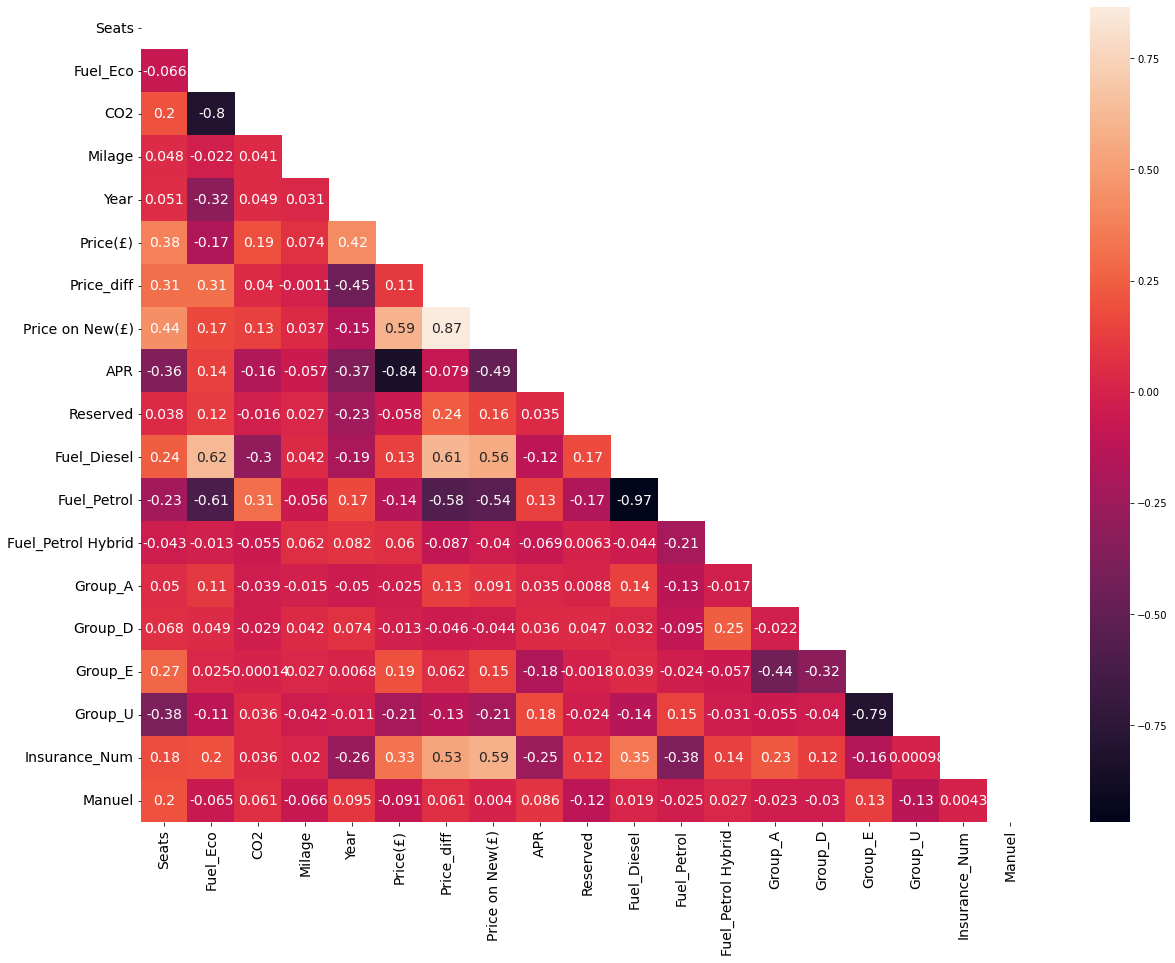

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Price(£) and Price per month have a near 1:1 correlation so we can drop Price per month. We also see that milage and Price don't actually have much correlation.
# May drop Price_diff as this is just a relation to price and price on new 
# APR may also be dropped

## Supected Multicollinearity
# Price_diff, Price on New(£) and APR
# C02, fuel_Eco, insurance_num

### Train & Test

In [48]:
prices = data['Price(£)']
variables = data.drop('Price(£)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(variables, prices, test_size=0.2, random_state=10)

In [49]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Interceopt', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
# Drop Price_diff & Price on New(£)

Training data r-squared: 1.0
Test data r-squared: 1.0
Interceopt -2.673914423212409e-10


,coef
Seats,2.079369e-13
Fuel_Eco,-4.345344e-13
CO2,-1.193005e-13
Milage,-2.239487e-17
Year,1.550432e-13
Price_diff,-1.000000e+00
Price on New(£),1.000000e+00
APR,-7.943368e-14
Reserved,-1.064394e-13
Fuel_Diesel,-3.388879e-13


In [50]:
data['Price(£)'].skew()

-0.6682098248553412

In [51]:
data = data.drop(columns=['Price_diff', 'Price on New(£)', 'APR'])

In [52]:
prices = data['Price(£)']
variables = data.drop('Price(£)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(variables, prices, test_size=0.2, random_state=10)

In [53]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#Challenge: print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Interceopt', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.5641942113522274
Test data r-squared: 0.5506365170842882
Interceopt -1294465.0972818052


,coef
Seats,717.404550
Fuel_Eco,-15.862641
CO2,5.642675
Milage,0.000175
Year,645.222238
Reserved,-190.420942
Fuel_Diesel,265.268381
Fuel_Petrol,-75.321698
Fuel_Petrol Hybrid,-189.946683
Group_A,-145.830780


In [54]:
data['Price(£)'].skew()

-0.6682098248553412

In [55]:
prices= np.log(data['Price(£)']) # Use log prices
features = data.drop('Price(£)', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Interceopt', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.5712115834956052
Test data r-squared: 0.5621475623513772
Interceopt -127.7740176548712


,coef
Seats,7.060857e-02
Fuel_Eco,-1.725559e-03
CO2,5.262092e-04
Milage,1.453598e-08
Year,6.776377e-02
Reserved,-1.865128e-02
Fuel_Diesel,3.095420e-02
Fuel_Petrol,-6.280153e-03
Fuel_Petrol Hybrid,-2.467405e-02
Group_A,-1.278006e-02


In [56]:
X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

,coef,p-values
const,-8.069938e+01,0.000
Seats,7.060857e-02,0.000
Fuel_Eco,-1.725559e-03,0.150
CO2,5.262092e-04,0.384
Milage,1.453598e-08,0.334
Year,6.776377e-02,0.000
Reserved,-1.865128e-02,0.232
Fuel_Diesel,-2.686884e+01,0.000
Fuel_Petrol,-2.690607e+01,0.000
Fuel_Petrol Hybrid,-2.692447e+01,0.000


### Multicollinearity

In [57]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
#type(X_incl_const)

1.5231237495836876

In [58]:
for i in range(X_incl_const.shape[1]):
    print(f'VIF for {X_incl_const.columns[i]} is {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')

# This infinite error has occured due to the fact of using One hot encoding, through this if the car is neither diesel or petrol it is the same as saying it is a petrol hybrid 
# We must there for drop one of the fuel columns and gorup columns

VIF for const is 0.0
VIF for Seats is 1.5231237495836876
VIF for Fuel_Eco is 7.377922523260289
VIF for CO2 is 4.639915071358331
VIF for Milage is 1.0188421023207173
VIF for Year is 1.4412370229229938
VIF for Reserved is 1.0859985069192784
VIF for Fuel_Diesel is inf
VIF for Fuel_Petrol is inf
VIF for Fuel_Petrol Hybrid is inf
VIF for Group_A is inf
VIF for Group_D is inf
VIF for Group_E is inf
VIF for Group_U is inf
VIF for Insurance_Num is 1.3968638917250773
VIF for Manuel is 1.086018511860864


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [59]:
prices = data['Price(£)']
variables = data.drop(columns=['Price(£)' ,'Fuel_Petrol','Group_A'], axis=1)
# 'Group_A','Group_D','Group_E', 'Group_U'
# 'Fuel_Diesel', 'Fuel_Petrol', 'Fuel_Petrol Hybrid'

X_train, X_test, y_train, y_test = train_test_split(variables, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Interceopt', regr.intercept_)

Training data r-squared: 0.5641942113522227
Test data r-squared: 0.5506365170843228
Interceopt -1294686.249759849


In [60]:
X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

,coef,p-values
const,-1.294686e+06,0.000
Seats,7.174045e+02,0.000
Fuel_Eco,-1.586264e+01,0.178
CO2,5.642675e+00,0.343
Milage,1.747414e-04,0.238
Year,6.452222e+02,0.000
Reserved,-1.904209e+02,0.215
Fuel_Diesel,3.405901e+02,0.054
Fuel_Petrol Hybrid,-1.146250e+02,0.812
Group_D,-7.267832e+02,0.073


In [61]:
for i in range(X_incl_const.shape[1]):
    print(f'VIF for {X_incl_const.columns[i]} is {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')

VIF for const is 2789434.461246012
VIF for Seats is 1.5231237495836876
VIF for Fuel_Eco is 7.377922523260326
VIF for CO2 is 4.639915071358255
VIF for Milage is 1.0188421023207173
VIF for Year is 1.4412370229230007
VIF for Reserved is 1.0859985069192757
VIF for Fuel_Diesel is 2.4900282636690547
VIF for Fuel_Petrol Hybrid is 1.158782266693282
VIF for Group_D is 1.7273503712882978
VIF for Group_E is 4.26860016817653
VIF for Group_U is 3.916424879584061
VIF for Insurance_Num is 1.3968638917250915
VIF for Manuel is 1.0860185118608632


In [62]:
vif = [] #empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range(X_incl_const.shape[1])] 

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif': np.around(vif,2)})
# cause for consurn for Fuel_Eco, Fuel_Diesel, Fuel_petrol

,coef_name,vif
0,const,2789434.46
1,Seats,1.52
2,Fuel_Eco,7.38
3,CO2,4.64
4,Milage,1.02
5,Year,1.44
6,Reserved,1.09
7,Fuel_Diesel,2.49
8,Fuel_Petrol Hybrid,1.16
9,Group_D,1.73


### Model

In [63]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})


print('BIC is', results.bic)
print('rsquared is', results.rsquared)

BIC is 13004.603201098287
rsquared is 0.5641942113522276


In [64]:
# Reduced model #1 excluding Fuel_Eco
X_incl_const = sm.add_constant(X_train).astype(float)
X_incl_const = X_incl_const.drop(['Fuel_Eco'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus  = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)

BIC is 12999.817791118809
rsquared is 0.563133919349418


In [65]:
# Reduced model #2 excluding more
X_incl_const = sm.add_constant(X_train).astype(float)
X_incl_const = X_incl_const.drop(['Fuel_Eco','Fuel_Petrol Hybrid','Group_U','Reserved','Milage','Fuel_Diesel'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)
# We have quite a small r^2 value suggesting we are missing some key data to determine a price of a car, this is proably the make and model which we would need more data for it to be significant.#
# We can currently only account for 56% of the price

BIC is 12971.524663015305
rsquared is 0.5603234414713497


In [66]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)
# We see from the p-value a lot of our variab;es were not statistically significant. This is proably due to the small amount of them. 

,coef,p-values,coef,p-values,coef,p-values
const,-1.294686e+06,0.000,-1.337378e+06,0.000,-1.343617e+06,0.000
Seats,7.174045e+02,0.000,7.325446e+02,0.000,7.523422e+02,0.000
Fuel_Eco,-1.586264e+01,0.178,NaN,NaN,NaN,NaN
CO2,5.642675e+00,0.343,1.245842e+01,0.000,1.119065e+01,0.000
Milage,1.747414e-04,0.238,1.758870e-04,0.235,NaN,NaN
Year,6.452222e+02,0.000,6.655319e+02,0.000,6.687084e+02,0.000
Reserved,-1.904209e+02,0.215,-1.907024e+02,0.214,NaN,NaN
Fuel_Diesel,3.405901e+02,0.054,1.886009e+02,0.167,NaN,NaN
Fuel_Petrol Hybrid,-1.146250e+02,0.812,-4.964462e+01,0.918,NaN,NaN
Group_D,-7.267832e+02,0.073,-7.679372e+02,0.058,-9.158756e+02,0.007


# Model with Make 

In [67]:
data.shape

(952, 16)

In [68]:
data_2 = df[df['Year'] != 2007]
data_2 = data_2.dropna()
data_2['Make'].value_counts()

Vauxhall         179
Ford             101
Fiat              86
Citroen           85
Peugeot           83
Renault           68
Nissan            42
Volkswagen        41
Skoda             30
Kia               29
Toyota            28
Mini              24
DS                20
Seat              20
Suzuki            20
Smart             18
Audi              16
Hyundai           14
Abarth            11
Honda              7
BMW                7
Mazda              4
Volvo              4
Jeep               4
Dacia              3
MG                 3
CHEVROLET          1
Dacier             1
Mercedes-Benz      1
Mitsubishi         1
Ssangyong          1
Name: Make, dtype: int64

In [69]:
data_2 = data_2.reset_index()

In [70]:
pop_make = list(data_2['Make'].value_counts().index[:19])

In [71]:
make_list =[]
for i in range(len(data_2['Make'])):
  if data_2['Make'][i] in pop_make:
    make_list.append(data_2['Make'][i])
  else:
    make_list.append('Other')

In [72]:
dum_data_2 = pd.DataFrame({'Make': make_list})
dum_data_2 = pd.get_dummies(dum_data_2)
data = data.join(dum_data_2)

In [73]:
data

,Seats,Fuel_Eco,CO2,Milage,Year,Price(£),Reserved,Fuel_Diesel,Fuel_Petrol,Fuel_Petrol Hybrid,Group_A,Group_D,Group_E,Group_U,Insurance_Num,Manuel,Make_Abarth,Make_Audi,Make_Citroen,Make_DS,Make_Fiat,Make_Ford,Make_Hyundai,Make_Kia,Make_Mini,Make_Nissan,Make_Other,Make_Peugeot,Make_Renault,Make_Seat,Make_Skoda,Make_Smart,Make_Suzuki,Make_Toyota,Make_Vauxhall,Make_Volkswagen
0,5,55.0,119,17824,2014,4499,False,0,1,0,0,0,1,0,4,True,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,4,65.0,99,51658,2014,5099,False,0,1,0,0,0,1,0,3,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,62.0,105,48599,2014,5099,False,0,1,0,0,0,1,0,1,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,54.0,120,25250,2014,5499,False,0,1,0,0,0,0,1,4,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,58.0,113,39838,2015,5999,False,0,1,0,0,0,0,1,7,True,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,5,57.0,114,9790,2016,13099,False,0,1,0,0,0,1,0,11,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
948,5,67.0,90,27005,2019,13099,False,1,0,0,1,0,0,0,19,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
949,5,60.0,108,14958,2018,13099,False,0,1,0,0,0,1,0,11,True,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
950,5,65.0,98,27973,2017,13099,False,0,1,0,0,0,1,0,12,True,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
prices = data['Price(£)']
variables = data.drop(columns=['Price(£)' ,'Fuel_Petrol','Group_A', 'Make_Other'], axis=1)
# 'Group_A','Group_D','Group_E', 'Group_U'
# 'Fuel_Diesel', 'Fuel_Petrol', 'Fuel_Petrol Hybrid'

X_train, X_test, y_train, y_test = train_test_split(variables, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Interceopt', regr.intercept_)

Training data r-squared: 0.6578321492583569
Test data r-squared: 0.6193191424032056
Interceopt -1520563.1975862887


In [75]:
X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

,coef,p-values
const,-1.520563e+06,0.000
Seats,9.256791e+02,0.000
Fuel_Eco,-1.728794e+00,0.873
CO2,8.521244e+00,0.161
Milage,1.691741e-04,0.210
Year,7.566290e+02,0.000
Reserved,-1.226168e+02,0.378
Fuel_Diesel,6.415988e+01,0.705
Fuel_Petrol Hybrid,3.119518e+02,0.535
Group_D,-1.128476e+03,0.003


In [76]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)
#type(X_incl_const)

2.788677864380937

In [77]:
for i in range(X_incl_const.shape[1]):
    print(f'VIF for {X_incl_const.columns[i]} is {variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)}')

# This infinite error has occured due to the fact of using One hot encoding, through this if the car is neither diesel or petrol it is the same as saying it is a petrol hybrid 
# We must there for drop one of the fuel columns and gorup columns

VIF for const is 3067962.030634518
VIF for Seats is 2.788677864380937
VIF for Fuel_Eco is 7.724981675786268
VIF for CO2 is 6.028908945131542
VIF for Milage is 1.050397428827474
VIF for Year is 1.5867508970196684
VIF for Reserved is 1.1085895928974838
VIF for Fuel_Diesel is 2.830580704577038
VIF for Fuel_Petrol Hybrid is 1.5575431352047626
VIF for Group_D is 1.8864912267304403
VIF for Group_E is 4.856947427995132
VIF for Group_U is 11.725384187658756
VIF for Insurance_Num is 2.453692548111029
VIF for Manuel is 1.1260115703165297
VIF for Make_Abarth is 2.64226554225681
VIF for Make_Audi is 1.610418211124882
VIF for Make_Citroen is 3.282043425947155
VIF for Make_DS is 1.6937809472895542
VIF for Make_Fiat is 8.898985196642514
VIF for Make_Ford is 3.4870222269614537
VIF for Make_Hyundai is 1.497320804054469
VIF for Make_Kia is 1.9916040061655216
VIF for Make_Mini is 1.8047798838384015
VIF for Make_Nissan is 2.1964165714848654
VIF for Make_Peugeot is 3.3512573395361436
VIF for Make_Renault i

In [78]:
vif = [] #empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
vif = [variance_inflation_factor(exog=X_incl_const.values,
                                 exog_idx=i) for i in range(X_incl_const.shape[1])] 

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif': np.around(vif,2)})
# cause for consurn for Fuel_Eco, Fuel_Diesel, Fuel_petrol

,coef_name,vif
0,const,3067962.03
1,Seats,2.79
2,Fuel_Eco,7.72
3,CO2,6.03
4,Milage,1.05
5,Year,1.59
6,Reserved,1.11
7,Fuel_Diesel,2.83
8,Fuel_Petrol Hybrid,1.56
9,Group_D,1.89


In [79]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)
# This is a large improevment on prevoius model (10% of price an be accounted for by the Make)

BIC is 12946.578913938181
rsquared is 0.6578321492583616


In [80]:
# Reduced model #1 excluding Fuel_Eco
X_incl_const = sm.add_constant(X_train).astype(float)
X_incl_const = X_incl_const.drop(['Fuel_Eco'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus  = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)

BIC is 12939.971031309311
rsquared is 0.6578201211370416


In [81]:
# Reduced model #2 excluding more
X_incl_const = sm.add_constant(X_train).astype(float)
X_incl_const = X_incl_const.drop(['Fuel_Eco','Fuel_Petrol Hybrid','Group_U','Reserved','Milage','Fuel_Diesel'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)

BIC is 12910.077725125015
rsquared is 0.6563421654105477


In [82]:
# Reduced model #3 excluding high VIg car makes
X_incl_const = sm.add_constant(X_train).astype(float)
X_incl_const = X_incl_const.drop(['Fuel_Eco','Fuel_Petrol Hybrid','Group_U','Reserved','Milage','Fuel_Diesel', 'Make_Fiat'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

mor_reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('rsquared is', results.rsquared)

# Our BIC value has reduced so this 

BIC is 12909.446117961303
rsquared is 0.653620555435573


# Residuels 

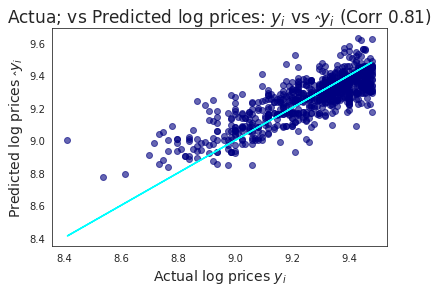

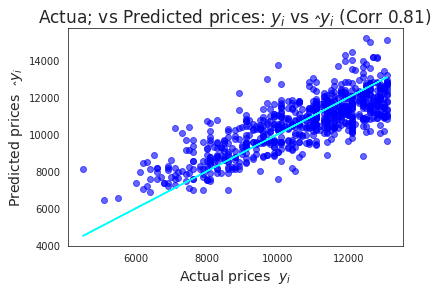

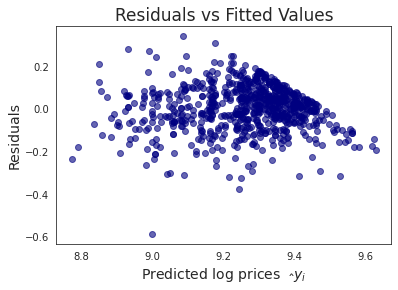

In [83]:
# Modified model: transformed (using log prices) & simplified (dropping  features)
prices= np.log(data['Price(£)']) # Use log prices
features = data.drop(['Price(£)','Fuel_Eco','Fuel_Petrol Hybrid','Group_U','Reserved','Milage','Fuel_Diesel','Make_Vauxhall', 'Make_Fiat'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train).astype(float)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actua; vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices  $y _i$', fontsize=14)
plt.ylabel('Predicted prices  $\hat y _i$', fontsize=14)
plt.title(f'Actua; vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices  $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [84]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared],
             'MSE':[reduced_log_mse],
             'RMSE':np.sqrt([reduced_log_mse])}, 
            index=['Reduced Log Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.659,0.012,0.109545


# Valuation (There seems to be an error with the prediction and was unable to resolve this at the time)


In [85]:
features = data.drop(columns=['Fuel_Eco','Fuel_Petrol Hybrid','Group_U','Reserved','Milage','Fuel_Diesel', 'Make_Fiat'], axis=1)
log_price = np.log(data['Price(£)'])
target = pd.DataFrame(log_price, columns=['Price(£)'])

In [86]:
features.mean()

Seats                  4.694328
CO2                  112.838235
Year                2016.884454
Price(£)           10676.905462
Fuel_Petrol            0.820378
Group_A                0.029412
Group_D                0.015756
Group_E                0.865546
Insurance_Num         11.051471
Manuel                 0.927521
Make_Abarth            0.011555
Make_Audi              0.016807
Make_Citroen           0.089286
Make_DS                0.021008
Make_Ford              0.106092
Make_Hyundai           0.014706
Make_Kia               0.030462
Make_Mini              0.025210
Make_Nissan            0.044118
Make_Other             0.038866
Make_Peugeot           0.087185
Make_Renault           0.071429
Make_Seat              0.021008
Make_Skoda             0.031513
Make_Smart             0.018908
Make_Suzuki            0.021008
Make_Toyota            0.029412
Make_Vauxhall          0.188025
Make_Volkswagen        0.043067
dtype: float64

In [87]:
Seats_INX = 0
CO2_INX = 1
Year_INX = 2
Fuel_Petrol_INX = 3
Group_A_INX = 4
Group_D_INX = 5
Group_E_INX = 6
Insurance_Num_INX = 7
Manuel_INX = 8

Make_Abarth_INX = 9 
Make_Audi_INX = 10
Make_Citroen_INX = 11
Make_DS_INX = 12 
Make_Ford_INX = 13
Make_Hyundai_INX = 14
Make_Kia_INX = 15
Make_Mini_INX = 16
Make_Nissan_INX = 17
Make_Other_INX = 18 
Make_Peugeot_INX = 19
Make_Renault_INX = 20 
Make_Seat_INX = 21
Make_Skoda_INX = 22 
Make_Smart_INX = 23
Make_Suzuki_INX = 25
Make_Toyota_INX = 26 
Make_Vauxhall_INX = 27 
Make_Volkswagen_IDX = 28

car_stats = features.mean().values.reshape(1,29)

In [88]:
car_stats

array([[4.69432773e+00, 1.12838235e+02, 2.01688445e+03, 1.06769055e+04,
        8.20378151e-01, 2.94117647e-02, 1.57563025e-02, 8.65546218e-01,
        1.10514706e+01, 9.27521008e-01, 1.15546218e-02, 1.68067227e-02,
        8.92857143e-02, 2.10084034e-02, 1.06092437e-01, 1.47058824e-02,
        3.04621849e-02, 2.52100840e-02, 4.41176471e-02, 3.88655462e-02,
        8.71848739e-02, 7.14285714e-02, 2.10084034e-02, 3.15126050e-02,
        1.89075630e-02, 2.10084034e-02, 2.94117647e-02, 1.88025210e-01,
        4.30672269e-02]])

In [89]:
regr = LinearRegression().fit(features,target)
fitted_vals = regr.predict(features)

# Challenge: calculate the MSE and RMSE using sklearn
MSE = mean_squared_error(target, fitted_vals,squared=True)
RMSE = mean_squared_error(target, fitted_vals,squared=False)

In [90]:
def get_log_estimate(Make, Transmission, Seats, Fuel_Type, Insurance_Group, CO2, Milage, Year, high_confidence=True):
  not_used = ['Milage']
  pop_makes = ['Abarth', 'Audi', 'Citroen', 'Ds', 'Fiat', 'Ford', 'Hyundai', 'Kia', 'Mini', 'Nissan','Dummy_index', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Smart', 'Suzuki', 'Toyota', 'Vauxhall', 'Volkswagen']
  nums = list(range(9,29))

  for position in pop_makes:
    if Make.capitalize() == position:
      nums.remove(pop_makes.index(position)+9)
    else:
      None
  
  if len(nums) == 20:
    nums.remove(20)


  for i in nums:
    car_stats[0][i] = 0
    if Transmission.capitalize() == 'Manuel':
      car_stats[0][Manuel_INX] = True
    else:
      None
      car_stats[0][Manuel_INX] = False

    if Fuel_Type.capitalize() == 'Petrol':
      car_stats[0][Fuel_Petrol_INX] = True
    else:
      None
      car_stats[0][Fuel_Petrol_INX] = False

  car_stats[0][Seats_INX] = Seats
  car_stats[0][CO2_INX] = CO2
  car_stats[0][Year_INX] = Year

  car_stats[0][Insurance_Num_INX] = int(re.findall(r'\d+',Insurance_Group)[0])
  
  char = re.findall("[a-zA-Z]+",Insurance_Group)[0]


  if char.upper == 'A':
    car_stats[0][Group_A_INX] = True
    car_stats[0][Group_D_INX] = False
    car_stats[0][Group_E_INX] = False
  elif char.upper == 'D':
    car_stats[0][Group_A_INX] = False
    car_stats[0][Group_D_INX] = True
    car_stats[0][Group_E_INX] = False
  elif char.upper == 'E':
    car_stats[0][Group_A_INX] = False
    car_stats[0][Group_D_INX] = False
    car_stats[0][Group_E_INX] = True
  else:
    None
    car_stats[0][Group_A_INX] = False
    car_stats[0][Group_D_INX] = False
    car_stats[0][Group_E_INX] = False   
    
    # Make prediction
  warnings.filterwarnings("ignore") # a warnimng apears while using regr.predict, "X does not have valid feature names, but LinearRegression was fitted with feature names"
  log_estimate = regr.predict(car_stats)[0][0]
    
    # Calc Range
  if high_confidence:
      upper_bound = log_estimate + 2*RMSE
      lower_bound = log_estimate - 2*RMSE
      interval = 95
  else:
      upper_bound = log_estimate + RMSE
      lower_bound = log_estimate - RMSE
      interval = 68
  
  return log_estimate, upper_bound, lower_bound, interval

In [91]:
df.sample()

,Make,Model,Registration,Location,Transmission,Seats,Fuel_Type,Fuel_Eco,Insurance_Group,CO2,Milage,Year,Price(£),Price_diff,Price on New(£),Price per month,APR,Reserved,URL
479,BMW,1 116d 1.5 Sport 5dr Nav Sun Protection,YD65VTA,Castle Donnington,Manual,5,Diesel,72.0,15E,103,62306,2015,10999,11656.0,22655.0,221.06,7.9,True,https://www.availablecar.com/used-cars/bmw-1-s...


In [92]:
est = get_log_estimate(Make='Vauxhall', Transmission='Manual', Seats=5, Fuel_Type='Petrol', Insurance_Group='8E', CO2=128, Milage=19483, Year=2018)
est

(8.308697047501807, 8.347416521462982, 8.269977573540633, 95)

In [93]:
log_est, upper, lower, conf = est


# Conver to today's dollars
dollar_est = np.e**log_est  
dollar_hi = np.e**upper  
dollar_low = np.e**lower  


# Round the dollar values to nearest thousand
rounded_est = np.around(dollar_est, 2)
rounded_hi = np.around(dollar_hi, 2)
rounded_low = np.around(dollar_low, 2)
                        

print(f'The estimated car value is {rounded_est}.')
print(f'At {conf}% confidence the valuation range is.')
print(f'USE {rounded_low} at the lower end to  {rounded_hi} at the high end.')

The estimated car value is 4059.02.
At 95% confidence the valuation range is.
USE 3904.86 at the lower end to  4219.27 at the high end.


# Results

In [94]:
data.corr()['Price(£)'].sort_values()

Make_Fiat            -0.224244
Group_U              -0.209972
Fuel_Eco             -0.169133
Fuel_Petrol          -0.140967
Make_Smart           -0.114495
Make_Toyota          -0.103537
Manuel               -0.090610
Reserved             -0.058145
Make_Skoda           -0.055869
Make_Peugeot         -0.049271
Make_DS              -0.034401
Group_A              -0.025393
Make_Seat            -0.024404
Make_Volkswagen      -0.014697
Group_D              -0.012802
Make_Hyundai         -0.011369
Make_Citroen         -0.001513
Make_Kia              0.007790
Make_Vauxhall         0.022814
Make_Abarth           0.033782
Make_Suzuki           0.034334
Make_Mini             0.049277
Fuel_Petrol Hybrid    0.059877
Milage                0.074428
Make_Renault          0.082820
Make_Nissan           0.087939
Make_Other            0.094022
Make_Ford             0.112191
Make_Audi             0.121549
Fuel_Diesel           0.128583
Group_E               0.192764
CO2                   0.193459
Insuranc

We know that key vairbales in determining the price of a car are:

1) The year it was made 

2) How many seats it has

3) The insurance number

3) The amount of CO2 or Fuel_Eco

4) Whether it is in Gorup E 

5) If it is a Diesel

With the other vairbles having a slightly smaller affect Fiats and being in Group U also corrispond to lower prices. 

Currently I do not think we have enough model vairbale for the model to be statistically significant. 

Another variable which would be useful would also be colour.